In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

# import warnings
# warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns

# Классификация типов леса
### (Forest types сlassification based on information about the area)

Область исследования включает в себя четыре зоны дикой природы, расположенные в Национальном лесу Рузвельта в Северном Колорадо. Каждое наблюдение представляет собой участок размером 30 м х 30 м. Существует семь типов:

1 - Spruce/Fir (Ель/Пихта)
2 - Lodgepole Pine (Разновидность сосны)
3 - Ponderosa Pine (разновидность сосны)
4 - Cottonwood/Willow (Тополь / Ива)
5 - Aspen (Осина)
6 - Douglas-fir
7 - Krummholz

Обучающий набор (15120 наблюдений) содержит как признаки, так и тип леса (Cover_Type).

Описание полей данных

Elevation - высота в метрах
Aspect - аспект в градусах Азимута
Slope - Крутизна склона в градусах
Horizontal_Distance_To_Hydrology - горизонтальное растояние до ближайшей поверхности водных объектов
Vertical_Distance_To_Hydrology - вертикальное растояние до ближайшей поверхности водных объектов
Horizontal_Distance_To_Roadways - горизонтального растояние до ближайшей проезжей части
Hillshade_9am (индекс от 0 до 255) - индекс Hillshade (освещённость) в 9 утра, день летнего солнцестояния
Hillshade_Noon (индекс от 0 до 255) - индекс Hillshade (освещённость) в полдень, день летнего солнцестояния
Hillshade_3pm (индекс от 0 до 255) - индекс Hillshade (освещённость) в 3 часа дня, День летнего солнцестояния
Horizontal_Distance_To_Fire_Points - горизонтального растояние до ближайшей точеки зажигания лесного пожара
Wilderness_Area (4 двоичных столбца, 0 = отсутствие или 1 = присутствие) - признак одной из четырёх территорий
Soil_Type (40 двоичных столбцов, 0 = отсутствие или 1 = наличие) - обозначение типа почвы
Cover_Type (7 типов, целые числа от 1 до 7) - обозначение типа лесного покрова

## Разделение данных по признаку территории (разные леса)

In [3]:
data = pd.read_csv("train.csv", sep=",")
X = data.copy()

In [4]:
print(X.loc[X['Wilderness_Area1'] == True, 'Wilderness_Area1'].count())
print(X.loc[X['Wilderness_Area2'] == True, 'Wilderness_Area2'].count())
print(X.loc[X['Wilderness_Area3'] == True, 'Wilderness_Area3'].count())
print(X.loc[X['Wilderness_Area4'] == True, 'Wilderness_Area4'].count())

3597
499
6349
4675


In [5]:
data.loc[data['Cover_Type'] == 3, 'Cover_Type'].count()

2160

In [6]:
data.groupby(['Cover_Type'])['Cover_Type'].count()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

In [7]:
WA1ind = data.loc[data['Wilderness_Area1'] == 1].index
WA2ind = data.loc[data['Wilderness_Area2'] == 1].index
WA3ind = data.loc[data['Wilderness_Area3'] == 1].index
WA4ind = data.loc[data['Wilderness_Area4'] == 1].index

In [8]:
wa1 = data.loc[WA1ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa2 = data.loc[WA2ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa3 = data.loc[WA3ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa4 = data.loc[WA4ind].groupby(['Cover_Type'])['Cover_Type'].count()

In [9]:
print(wa1)
print(wa2)
print(wa3)
print(wa4)

Cover_Type
1    1062
2    1134
5     856
7     545
Name: Cover_Type, dtype: int64
Cover_Type
1    181
2     66
7    252
Name: Cover_Type, dtype: int64
Cover_Type
1     917
2     940
3     863
5    1304
6     962
7    1363
Name: Cover_Type, dtype: int64
Cover_Type
2      20
3    1297
4    2160
6    1198
Name: Cover_Type, dtype: int64


#### Общий массив разделён по признаку принадлежности к разным участкам леса
#### Четыре разных участка:

Text(0.5, 1.0, 'Wilderness_Area4')

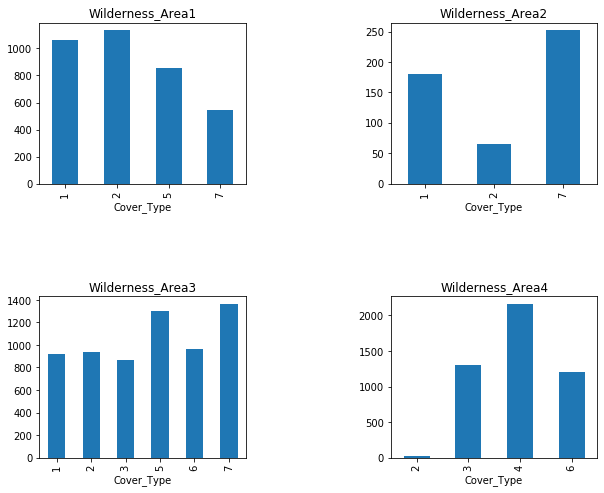

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(10, 8)
fig.subplots_adjust(wspace=0.7, hspace=0.7)

wa1.plot(kind="bar", ax = ax1)
wa2.plot(kind="bar", ax = ax2)
wa3.plot(kind="bar", ax = ax3)
wa4.plot(kind="bar", ax = ax4)
ax1.set_title("Wilderness_Area1")
ax2.set_title("Wilderness_Area2")
ax3.set_title("Wilderness_Area3")
ax4.set_title("Wilderness_Area4")

In [11]:
forest_1 = X.loc[X['Wilderness_Area1'] == 1].copy()
forest_2 = X.loc[X['Wilderness_Area2'] == 1].copy()
forest_3 = X.loc[X['Wilderness_Area3'] == 1].copy()
forest_4 = X.loc[X['Wilderness_Area4'] == 1].copy()

In [12]:
def feature_remover(sc_data):
    drop_list = []
    for ind in range(0, sc_data.shape[1]):
        if sc_data.iloc[:,ind].nunique() < 3:
            #print("Drop {}".format(sc_data.keys()[ind]))
            drop_list.append(ind)
    sc_data.drop(sc_data.keys()[drop_list], axis=1, inplace = True)
    return sc_data

In [44]:
all_forest_list = [forest_1, forest_2, forest_3, forest_4]
for fr in all_forest_list:
    fr = feature_remover(fr)
    # print(fr.nunique())

In [41]:
X = feature_remover(X)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Cover_Type                          15120 non-null  int64
dtypes: i

## Анализ взаимосвязей признаков

### Участок 1

In [14]:
forest_1.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000
mean,4905.439255,2996.325271,130.814290,14.189324,223.660550,38.161245,2586.252155,222.187934,218.379483,125.256603,2359.084793,3.176258
std,4873.740493,233.172915,98.993519,8.153663,179.246348,51.250737,1802.999984,22.160810,22.290185,42.024161,1436.206301,2.200607
min,1.000000,2482.000000,0.000000,0.000000,0.000000,-134.000000,67.000000,90.000000,99.000000,0.000000,42.000000,1.000000
25%,900.000000,2796.000000,61.000000,8.000000,90.000000,3.000000,859.000000,213.000000,208.000000,101.000000,1381.000000,1.000000
50%,1833.000000,2979.000000,95.000000,13.000000,182.000000,22.000000,2440.000000,227.000000,223.000000,130.000000,2136.000000,2.000000
75%,11363.000000,3195.000000,171.000000,19.000000,313.000000,60.000000,4094.000000,237.000000,233.000000,153.000000,2932.000000,5.000000
max,14592.000000,3675.000000,359.000000,50.000000,1045.000000,411.000000,6890.000000,254.000000,254.000000,245.000000,6993.000000,7.000000


In [15]:
forest_1.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,1.000000,0.270484,-0.007781,0.059479,-0.001005,0.034339,-0.109449,0.037006,-0.022760,-0.045352,-0.110815,0.083935
Elevation,0.270484,1.000000,0.121128,-0.133357,0.218084,0.088839,0.440339,-0.150300,0.188238,0.219503,-0.012084,0.078877
Aspect,-0.007781,0.121128,1.000000,-0.100408,0.023068,-0.000957,0.280974,-0.567605,0.365322,0.570685,0.030331,-0.126604
Slope,0.059479,-0.133357,-0.100408,1.000000,0.026074,0.317701,-0.384351,0.072865,-0.783764,-0.632238,-0.196070,0.229576
Horizontal_Distance_To_Hydrology,-0.001005,0.218084,0.023068,0.026074,1.000000,0.585652,0.123034,-0.035255,0.047722,0.045457,0.049661,-0.135377
Vertical_Distance_To_Hydrology,0.034339,0.088839,-0.000957,0.317701,0.585652,1.000000,-0.093935,-0.009155,-0.224552,-0.165610,-0.086201,0.059048
Horizontal_Distance_To_Roadways,-0.109449,0.440339,0.280974,-0.384351,0.123034,-0.093935,1.000000,-0.336077,0.432934,0.511154,0.271153,-0.260282
Hillshade_9am,0.037006,-0.150300,-0.567605,0.072865,-0.035255,-0.009155,-0.336077,1.000000,-0.172839,-0.744639,-0.099060,0.232027
Hillshade_Noon,-0.022760,0.188238,0.365322,-0.783764,0.047722,-0.224552,0.432934,-0.172839,1.000000,0.773781,0.149829,-0.220270
Hillshade_3pm,-0.045352,0.219503,0.570685,-0.632238,0.045457,-0.165610,0.511154,-0.744639,0.773781,1.000000,0.174331,-0.306557


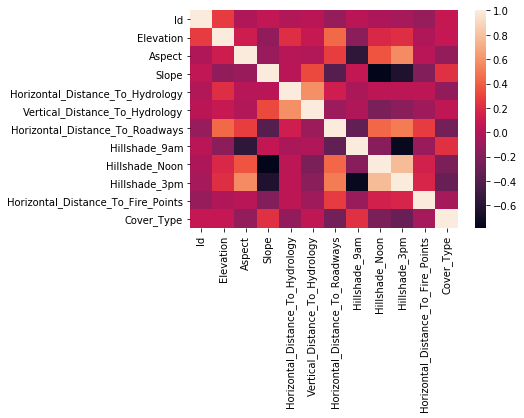

In [16]:
sns.heatmap(forest_1.corr())

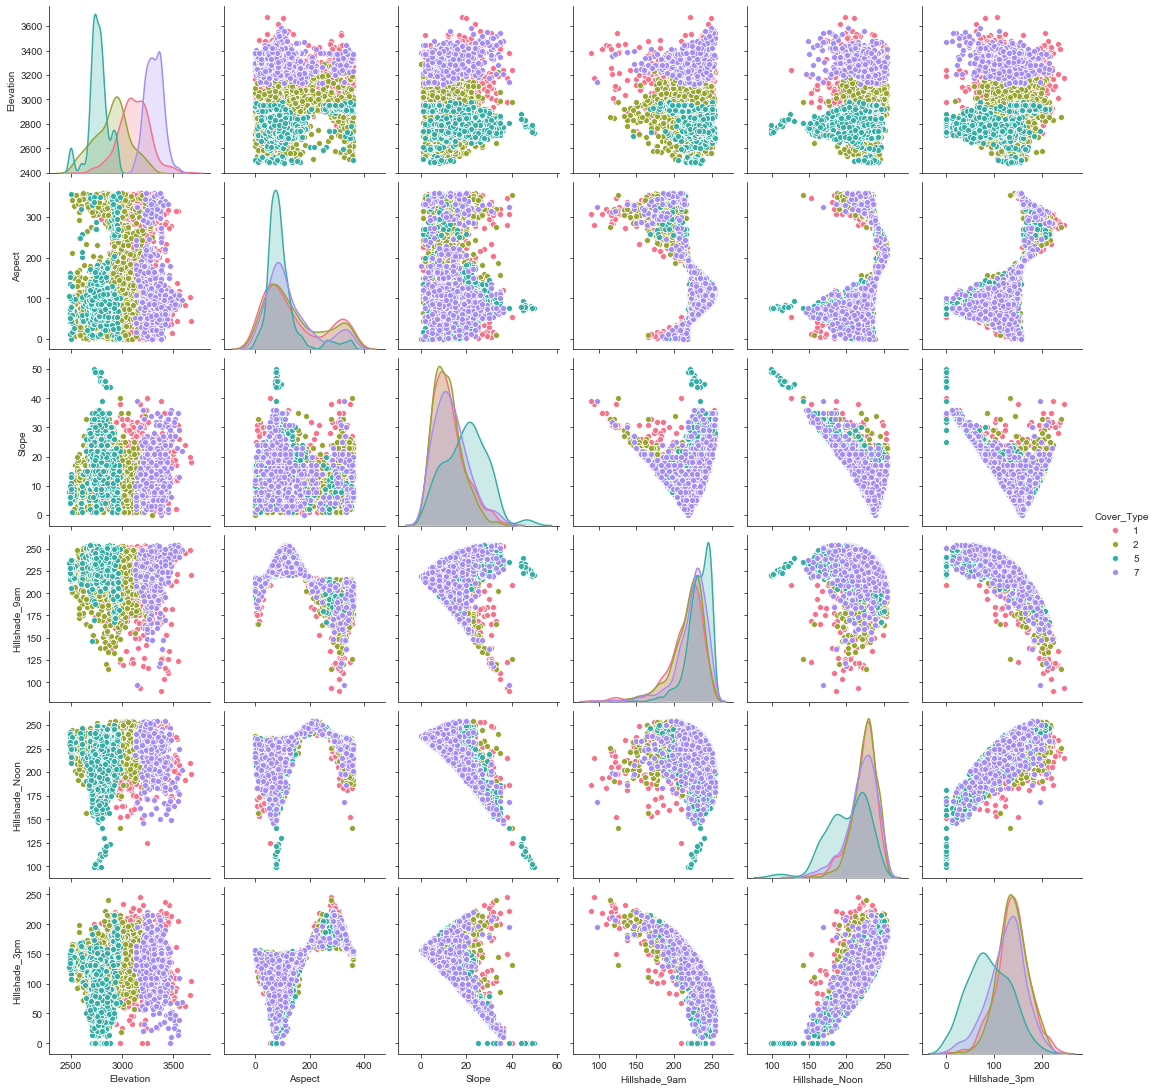

In [17]:
sns.set_style("ticks")
sns.pairplot(forest_1[["Elevation", "Aspect", "Slope", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

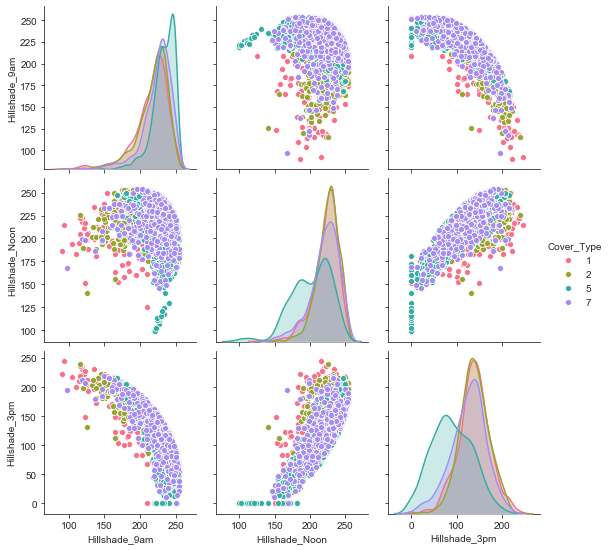

In [18]:
sns.set_style("ticks")
sns.pairplot(forest_1[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

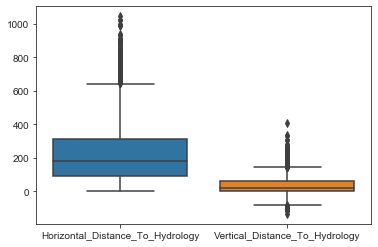

In [19]:
sns.boxplot(data=forest_1[["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology"]], orient="v")

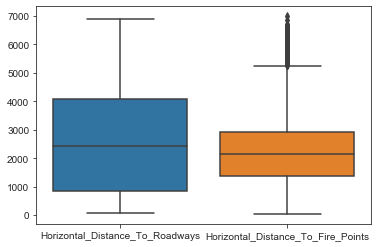

In [20]:
sns.boxplot(data=forest_1[["Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points"]], orient="v")

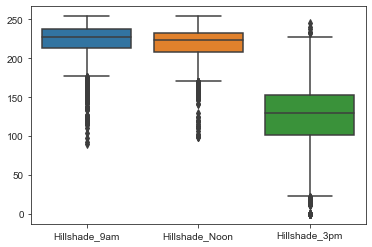

In [21]:
sns.boxplot(data=forest_1[["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]], orient="v")

### Участок 2

In [22]:
forest_2.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,11304.911824,3341.044088,173.503006,13.484970,326.673347,56.747495,1134.797595,210.703407,223.713427,145.503006,1777.763527,4.162325
std,1889.524565,139.001770,120.541922,6.760777,223.401415,70.541084,511.702283,28.674048,15.421782,35.438412,1126.307415,2.886004
min,9309.000000,2978.000000,0.000000,1.000000,0.000000,-146.000000,108.000000,107.000000,153.000000,57.000000,30.000000,1.000000
25%,10263.500000,3231.500000,68.000000,9.000000,151.500000,5.000000,766.000000,195.000000,216.000000,120.000000,1031.500000,1.000000
50%,10446.000000,3353.000000,137.000000,13.000000,285.000000,38.000000,1120.000000,216.000000,225.000000,147.000000,1559.000000,7.000000
75%,10629.000000,3437.000000,307.000000,18.000000,474.000000,84.500000,1489.000000,233.000000,233.000000,168.000000,2094.500000,7.000000
max,14874.000000,3643.000000,359.000000,39.000000,997.000000,238.000000,2505.000000,253.000000,254.000000,231.000000,5753.000000,7.000000


In [23]:
forest_2.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,1.000000,0.101448,-0.058492,0.081920,-0.012244,0.117391,0.046721,-0.046912,-0.055696,0.009974,0.120490,0.055021
Elevation,0.101448,1.000000,-0.160299,0.085524,0.216650,0.344046,0.485863,-0.031456,-0.198072,-0.065779,-0.151740,0.756954
Aspect,-0.058492,-0.160299,1.000000,0.174088,-0.100049,-0.004627,-0.122092,-0.632124,0.165090,0.658852,-0.119557,-0.133490
Slope,0.081920,0.085524,0.174088,1.000000,-0.096519,0.180559,0.050511,-0.373250,-0.519993,-0.021906,0.097404,0.030639
Horizontal_Distance_To_Hydrology,-0.012244,0.216650,-0.100049,-0.096519,1.000000,0.526659,-0.214675,0.007924,0.038115,0.022564,-0.224831,0.028636
Vertical_Distance_To_Hydrology,0.117391,0.344046,-0.004627,0.180559,0.526659,1.000000,-0.052874,-0.209901,-0.149043,0.111763,-0.148855,0.136072
Horizontal_Distance_To_Roadways,0.046721,0.485863,-0.122092,0.050511,-0.214675,-0.052874,1.000000,0.056547,-0.174586,-0.131202,0.302724,0.314760
Hillshade_9am,-0.046912,-0.031456,-0.632124,-0.373250,0.007924,-0.209901,0.056547,1.000000,0.135264,-0.854640,0.099264,0.072117
Hillshade_Noon,-0.055696,-0.198072,0.165090,-0.519993,0.038115,-0.149043,-0.174586,0.135264,1.000000,0.379878,0.036203,-0.202069
Hillshade_3pm,0.009974,-0.065779,0.658852,-0.021906,0.022564,0.111763,-0.131202,-0.854640,0.379878,1.000000,-0.091847,-0.161579


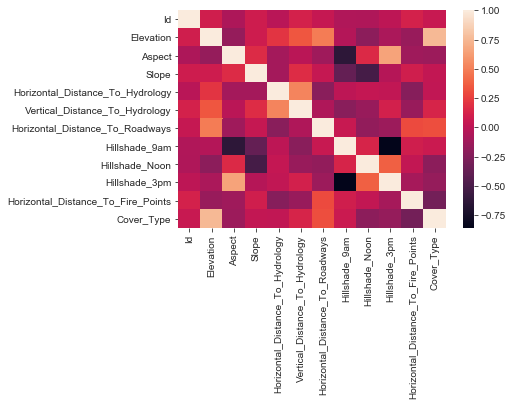

In [24]:
sns.heatmap(forest_2.corr())

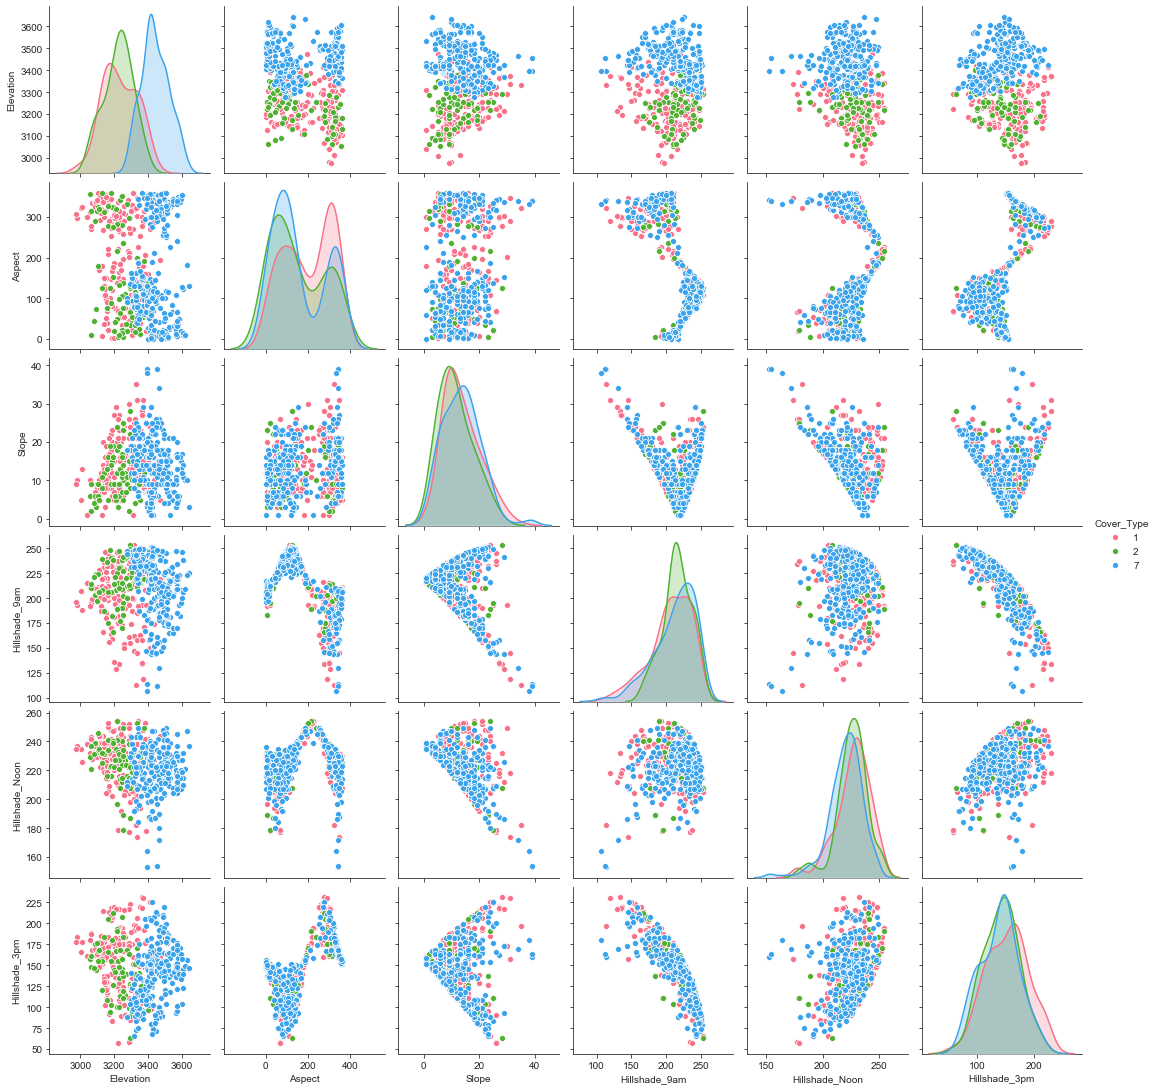

In [25]:
sns.set_style("ticks")
sns.pairplot(forest_2[["Elevation", "Aspect", "Slope", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

### Участок 3

In [26]:
forest_3.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000,6349.000000
mean,9531.615372,2923.116081,160.891794,15.378485,276.708458,56.106473,1907.727359,212.103166,224.020318,142.182706,1518.206017,4.287132
std,3363.589767,319.124056,108.490632,7.431408,246.691628,66.586037,1072.201316,26.518839,20.681232,39.944109,842.253981,2.165620
min,1621.000000,2301.000000,0.000000,0.000000,0.000000,-123.000000,0.000000,0.000000,99.000000,0.000000,30.000000,1.000000
25%,7540.000000,2655.000000,64.000000,10.000000,90.000000,7.000000,1129.000000,196.000000,212.000000,118.000000,870.000000,2.000000
50%,9306.000000,2869.000000,149.000000,14.000000,212.000000,37.000000,1776.000000,217.000000,226.000000,143.000000,1368.000000,5.000000
75%,11331.000000,3226.000000,252.000000,20.000000,390.000000,84.000000,2460.000000,231.000000,241.000000,171.000000,2018.000000,6.000000
max,15120.000000,3849.000000,359.000000,52.000000,1343.000000,554.000000,5463.000000,254.000000,254.000000,248.000000,4481.000000,7.000000


In [27]:
forest_3.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,1.000000,0.034652,-0.062829,0.045559,0.048760,0.024625,0.130805,0.082138,-0.029909,-0.091953,0.046685,-0.023124
Elevation,0.034652,1.000000,0.096568,-0.151458,0.449895,0.314538,0.603524,-0.002255,0.062470,0.062902,0.352971,0.165207
Aspect,-0.062829,0.096568,1.000000,0.032077,0.063310,0.056332,0.106733,-0.573501,0.374394,0.646469,0.036036,-0.004957
Slope,0.045559,-0.151458,0.032077,1.000000,-0.070378,0.208210,-0.045313,-0.212221,-0.440306,-0.238671,-0.112265,0.004434
Horizontal_Distance_To_Hydrology,0.048760,0.449895,0.063310,-0.070378,1.000000,0.695060,0.240755,-0.063062,0.047818,0.092700,0.199856,0.022462
Vertical_Distance_To_Hydrology,0.024625,0.314538,0.056332,0.208210,0.695060,1.000000,0.210061,-0.100474,-0.083108,0.003228,0.152866,0.075809
Horizontal_Distance_To_Roadways,0.130805,0.603524,0.106733,-0.045313,0.240755,0.210061,1.000000,-0.058210,0.050125,0.085320,0.475968,0.152535
Hillshade_9am,0.082138,-0.002255,-0.573501,-0.212221,-0.063062,-0.100474,-0.058210,1.000000,-0.042721,-0.791073,-0.049835,0.024541
Hillshade_Noon,-0.029909,0.062470,0.374394,-0.440306,0.047818,-0.083108,0.050125,-0.042721,1.000000,0.618035,0.026488,-0.090214
Hillshade_3pm,-0.091953,0.062902,0.646469,-0.238671,0.092700,0.003228,0.085320,-0.791073,0.618035,1.000000,0.079705,-0.066189


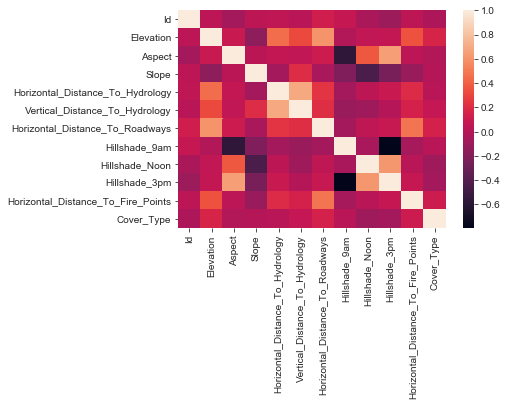

In [28]:
sns.heatmap(forest_3.corr())

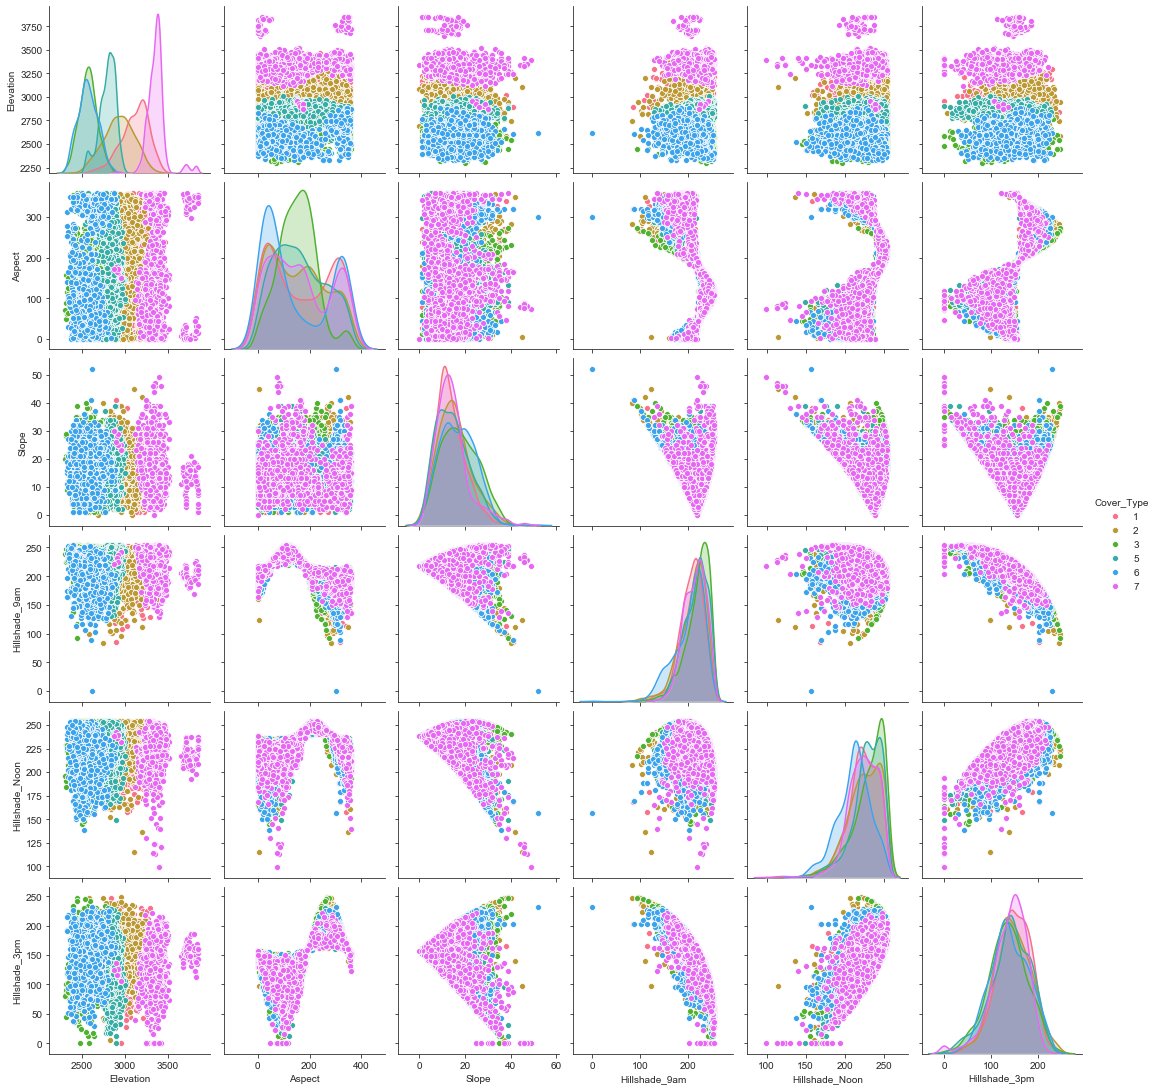

In [29]:
sns.set_style("ticks")
sns.pairplot(forest_3[["Elevation", "Aspect", "Slope", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

### Участок 4

In [30]:
forest_4.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000,4675.000000
mean,6526.741818,2260.091979,169.054973,20.127914,152.055615,53.577326,841.680642,206.437433,212.045134,131.918503,820.689840,4.226524
std,3786.758198,131.713631,115.780792,8.955669,141.492075,58.188586,394.691780,38.616257,24.658426,54.677124,436.056935,1.126291
min,1821.000000,1863.000000,0.000000,1.000000,0.000000,-115.000000,0.000000,58.000000,120.000000,0.000000,0.000000,2.000000
25%,3791.500000,2161.500000,74.000000,13.000000,30.000000,2.000000,516.000000,180.000000,197.000000,91.000000,484.000000,3.000000
50%,5137.000000,2273.000000,129.000000,20.000000,120.000000,35.000000,850.000000,215.000000,216.000000,134.000000,765.000000,4.000000
75%,6963.500000,2356.000000,297.000000,27.000000,247.000000,89.000000,1167.000000,240.000000,229.500000,174.000000,1129.000000,6.000000
max,13639.000000,2622.000000,360.000000,47.000000,624.000000,272.000000,1770.000000,254.000000,254.000000,248.000000,2001.000000,6.000000


In [31]:
forest_4.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
Id,1.000000,0.202575,0.011184,-0.078022,-0.028826,-0.033759,0.046593,0.019775,0.049878,0.023595,0.130486,0.066055
Elevation,0.202575,1.000000,0.056335,-0.192311,0.388254,0.258481,0.145532,0.015360,0.188405,0.114768,0.320525,0.096459
Aspect,0.011184,0.056335,1.000000,0.017148,0.068103,0.053201,0.102360,-0.617127,0.308562,0.668364,-0.031462,0.094491
Slope,-0.078022,-0.192311,0.017148,1.000000,0.168646,0.327201,-0.111704,-0.216227,-0.640366,-0.283102,-0.116003,-0.032632
Horizontal_Distance_To_Hydrology,-0.028826,0.388254,0.068103,0.168646,1.000000,0.772814,-0.024828,-0.077393,-0.046953,0.018759,0.090902,0.014279
Vertical_Distance_To_Hydrology,-0.033759,0.258481,0.053201,0.327201,0.772814,1.000000,-0.025044,-0.076236,-0.178670,-0.073818,0.045900,-0.057451
Horizontal_Distance_To_Roadways,0.046593,0.145532,0.102360,-0.111704,-0.024828,-0.025044,1.000000,0.016150,0.215004,0.107028,-0.037604,0.097267
Hillshade_9am,0.019775,0.015360,-0.617127,-0.216227,-0.077393,-0.076236,0.016150,1.000000,0.027583,-0.812100,0.097344,-0.128490
Hillshade_Noon,0.049878,0.188405,0.308562,-0.640366,-0.046953,-0.178670,0.215004,0.027583,1.000000,0.538992,0.087540,-0.024820
Hillshade_3pm,0.023595,0.114768,0.668364,-0.283102,0.018759,-0.073818,0.107028,-0.812100,0.538992,1.000000,-0.018289,0.114174


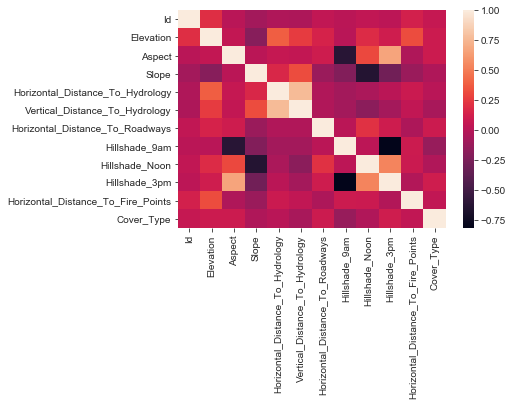

In [32]:
sns.heatmap(forest_4.corr())

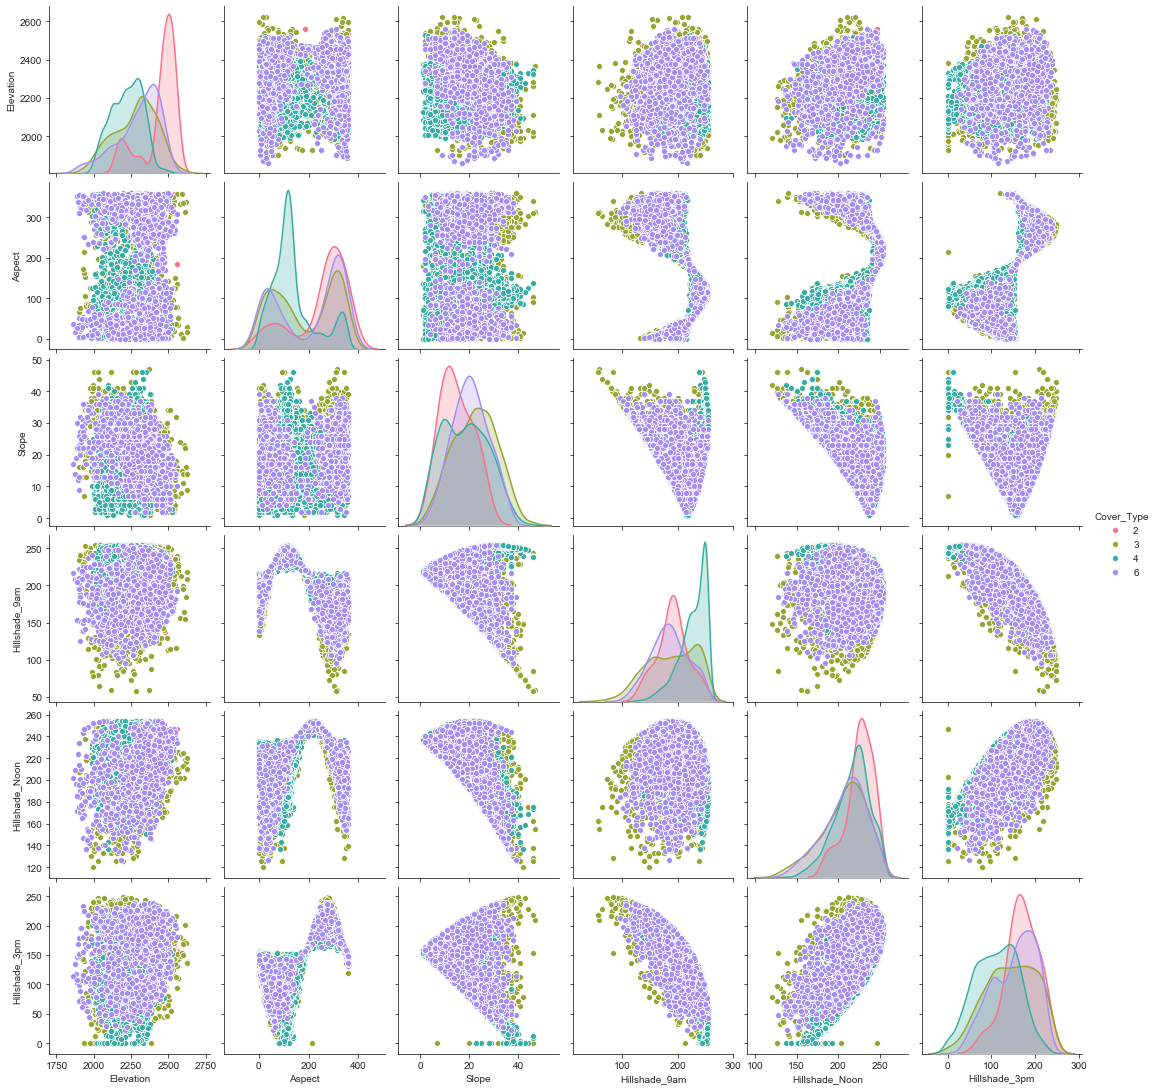

In [33]:
sns.set_style("ticks")
sns.pairplot(forest_4[["Elevation", "Aspect", "Slope", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Cover_Type"]],hue = 'Cover_Type',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

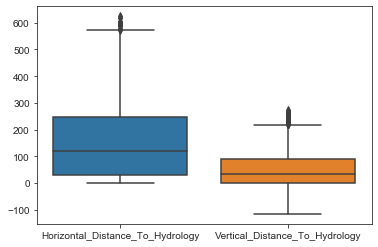

In [34]:
sns.boxplot(data=forest_4[["Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology"]], orient="v")

### Анализ среднеквадратеческого отклонения

In [47]:
stand_dev = pd.DataFrame({"std":  X.describe().loc['std'],
                          "std1": forest_1.describe().loc['std'], 
                          "std2": forest_2.describe().loc['std'], 
                          "std3": forest_3.describe().loc['std'], 
                          "std4": forest_4.describe().loc['std']})
stand_dev

,std,std1,std2,std3,std4
Id,4364.912370,4873.740493,1889.524565,3363.589767,3786.758198
Elevation,417.678187,233.172915,139.001770,319.124056,131.713631
Aspect,110.085801,98.993519,120.541922,108.490632,115.780792
Slope,8.453927,8.153663,6.760777,7.431408,8.955669
Horizontal_Distance_To_Hydrology,210.075296,179.246348,223.401415,246.691628,141.492075
Vertical_Distance_To_Hydrology,61.239406,51.250737,70.541084,66.586037,58.188586
Horizontal_Distance_To_Roadways,1325.066358,1802.999984,511.702283,1072.201316,394.691780
Hillshade_9am,30.561287,22.160810,28.674048,26.518839,38.616257
Hillshade_Noon,22.801966,22.290185,15.421782,20.681232,24.658426
Hillshade_3pm,45.895189,42.024161,35.438412,39.944109,54.677124


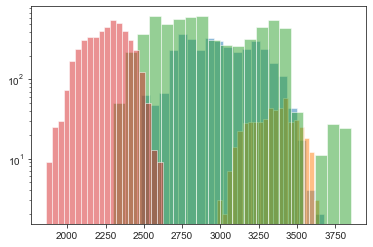

In [53]:
plt.hist(forest_1['Elevation'], bins=20, log=True, alpha=0.5)
plt.hist(forest_2['Elevation'], bins=20, log=True, alpha=0.5)
plt.hist(forest_3['Elevation'], bins=20, log=True, alpha=0.5)
plt.hist(forest_4.loc[:, 'Elevation'], bins=20, log=True, alpha=0.5)

plt.show()

#### Анализ среднеквадратических отклонений признаков совместной выборки и отдельных участков показывает различия в характеристиках участков. Разделение общей выборки на участки было оправдано

### Тест на нормальное распределение признаков

In [48]:
from statsmodels.stats.diagnostic import lilliefors

In [50]:
X['Elevation']

0        2596
1        2590
2        2804
3        2785
4        2595
         ... 
15115    2607
15116    2603
15117    2492
15118    2487
15119    2475
Name: Elevation, Length: 15120, dtype: int64

In [79]:
s_x, p_x = lilliefors(x=X['Elevation'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Elevation'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Elevation'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Elevation'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Elevation'], pvalmethod='table')
print("Параметр Elevation")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Elevation
Общая выборка	st: 0.0696	p: 0.0010
Лес 1		st: 0.0659	p: 0.0010
Лес 2		st: 0.0612	p: 0.0010
Лес 3		st: 0.0803	p: 0.0010
Лес 4		st: 0.0431	p: 0.0010


In [80]:
s_x, p_x = lilliefors(x=X['Aspect'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Aspect'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Aspect'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Aspect'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Aspect'], pvalmethod='table')
print("Параметр Aspect")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Aspect
Общая выборка	st: 0.1152	p: 0.0010
Лес 1		st: 0.1677	p: 0.0010
Лес 2		st: 0.1396	p: 0.0010
Лес 3		st: 0.0807	p: 0.0010
Лес 4		st: 0.1468	p: 0.0010


In [81]:
s_x, p_x = lilliefors(x=X['Slope'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Slope'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Slope'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Slope'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Slope'], pvalmethod='table')
print("Параметр Slope")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Slope
Общая выборка	st: 0.0795	p: 0.0010
Лес 1		st: 0.0970	p: 0.0010
Лес 2		st: 0.0739	p: 0.0010
Лес 3		st: 0.0826	p: 0.0010
Лес 4		st: 0.0509	p: 0.0010


In [82]:
s_x, p_x = lilliefors(x=X['Horizontal_Distance_To_Hydrology'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Horizontal_Distance_To_Hydrology'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Horizontal_Distance_To_Hydrology'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Horizontal_Distance_To_Hydrology'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Horizontal_Distance_To_Hydrology'], pvalmethod='table')
print("Параметр Horizontal_Distance_To_Hydrology")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Horizontal_Distance_To_Hydrology
Общая выборка	st: 0.1397	p: 0.0010
Лес 1		st: 0.1061	p: 0.0010
Лес 2		st: 0.0770	p: 0.0010
Лес 3		st: 0.1310	p: 0.0010
Лес 4		st: 0.1413	p: 0.0010


In [83]:
s_x, p_x = lilliefors(x=X['Vertical_Distance_To_Hydrology'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Vertical_Distance_To_Hydrology'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Vertical_Distance_To_Hydrology'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Vertical_Distance_To_Hydrology'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Vertical_Distance_To_Hydrology'], pvalmethod='table')
print("Параметр Vertical_Distance_To_Hydrology")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Vertical_Distance_To_Hydrology
Общая выборка	st: 0.1358	p: 0.0010
Лес 1		st: 0.1362	p: 0.0010
Лес 2		st: 0.1209	p: 0.0010
Лес 3		st: 0.1334	p: 0.0010
Лес 4		st: 0.1508	p: 0.0010


In [84]:
s_x, p_x = lilliefors(x=X['Horizontal_Distance_To_Roadways'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Horizontal_Distance_To_Roadways'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Horizontal_Distance_To_Roadways'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Horizontal_Distance_To_Roadways'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Horizontal_Distance_To_Roadways'], pvalmethod='table')
print("Параметр Horizontal_Distance_To_Roadways")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Horizontal_Distance_To_Roadways
Общая выборка	st: 0.1388	p: 0.0010
Лес 1		st: 0.0880	p: 0.0010
Лес 2		st: 0.0409	p: 0.0616
Лес 3		st: 0.0708	p: 0.0010
Лес 4		st: 0.0555	p: 0.0010


In [85]:
s_x, p_x = lilliefors(x=X['Hillshade_9am'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Hillshade_9am'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Hillshade_9am'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Hillshade_9am'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Hillshade_9am'], pvalmethod='table')
print("Параметр Hillshade_9am")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Hillshade_9am
Общая выборка	st: 0.1013	p: 0.0010
Лес 1		st: 0.1193	p: 0.0010
Лес 2		st: 0.0862	p: 0.0010
Лес 3		st: 0.0791	p: 0.0010
Лес 4		st: 0.1090	p: 0.0010


In [86]:
s_x, p_x = lilliefors(x=X['Hillshade_Noon'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Hillshade_Noon'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Hillshade_Noon'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Hillshade_Noon'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Hillshade_Noon'], pvalmethod='table')
print("Параметр Hillshade_Noon")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Hillshade_Noon
Общая выборка	st: 0.0763	p: 0.0010
Лес 1		st: 0.1090	p: 0.0010
Лес 2		st: 0.0750	p: 0.0010
Лес 3		st: 0.0736	p: 0.0010
Лес 4		st: 0.0698	p: 0.0010


In [87]:
s_x, p_x = lilliefors(x=X['Hillshade_3pm'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Hillshade_3pm'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Hillshade_3pm'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Hillshade_3pm'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Hillshade_3pm'], pvalmethod='table')
print("Параметр Hillshade_3pm")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Hillshade_3pm
Общая выборка	st: 0.0362	p: 0.0010
Лес 1		st: 0.0660	p: 0.0010
Лес 2		st: 0.0353	p: 0.1904
Лес 3		st: 0.0307	p: 0.0010
Лес 4		st: 0.0389	p: 0.0010


In [88]:
s_x, p_x = lilliefors(x=X['Horizontal_Distance_To_Fire_Points'], pvalmethod='table')
s_f1, p_f1 = lilliefors(x=forest_1['Horizontal_Distance_To_Fire_Points'], pvalmethod='table')
s_f2, p_f2 = lilliefors(x=forest_2['Horizontal_Distance_To_Fire_Points'], pvalmethod='table')
s_f3, p_f3 = lilliefors(x=forest_3['Horizontal_Distance_To_Fire_Points'], pvalmethod='table')
s_f4, p_f4 = lilliefors(x=forest_4['Horizontal_Distance_To_Fire_Points'], pvalmethod='table')
print("Параметр Horizontal_Distance_To_Fire_Points")
print("Общая выборка\tst: {:.4f}\tp: {:.4f}".format(s_x, p_x))
print("Лес 1\t\tst: {:.4f}\tp: {:.4f}".format(s_f1, p_f1))
print("Лес 2\t\tst: {:.4f}\tp: {:.4f}".format(s_f2, p_f2))
print("Лес 3\t\tst: {:.4f}\tp: {:.4f}".format(s_f3, p_f3))
print("Лес 4\t\tst: {:.4f}\tp: {:.4f}".format(s_f4, p_f4))

Параметр Horizontal_Distance_To_Fire_Points
Общая выборка	st: 0.1078	p: 0.0010
Лес 1		st: 0.1126	p: 0.0010
Лес 2		st: 0.1475	p: 0.0010
Лес 3		st: 0.0725	p: 0.0010
Лес 4		st: 0.0614	p: 0.0010


#### Для большинства признаков уровень значимости при котором можно принять гипотезу о нормальном распределении меньше 0,001. Гипотезу о нормальном распределении отклоняем. Это ограничивает применение инструментов анализа.